<a href="https://colab.research.google.com/github/Rahmamouradsayed/ML-models-from-scratch-/blob/main/Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


In [ ]:
# Step 1: Define the linear equation y = 3x + 2
def linear_equation(x):
    return 3 * x + 2

# Step 2: Select 5 different values for x and calculate corresponding y values
x_values = np.array([1, 2, 3, 4, 5])
y_values = linear_equation(x_values)

# Step 3: Apply the Mean Squared Error (MSE) technique to obtain the equation of the line that best fits the training data
model = LinearRegression()
model.fit(x_values.reshape(-1, 1), y_values)

# Retrieve the coefficients (slope and intercept) of the line
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the line that best fits the training data
print("Equation of the line without noise:")
print(f"y = {slope:.2f} * x + {intercept:.2f}")


Equation of the line without noise:
y = 3.00 * x + 2.00



Equation of the line with noise:
y = 3.09 * x + 2.32


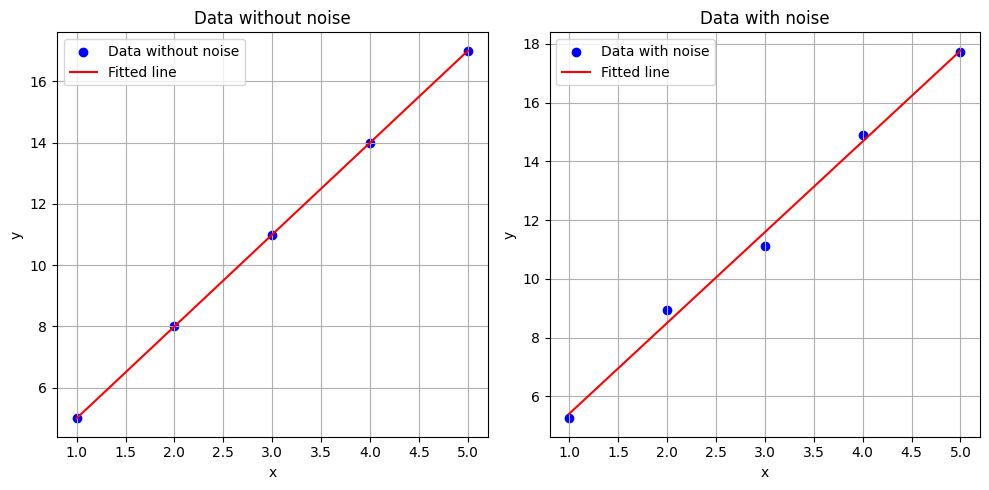

In [ ]:
# Step 4: Add random noise term to the equation y = 3x + 2
# Adding random noise term
noise = np.random.uniform(0, 1, size=x_values.shape)
y_values_with_noise = linear_equation(x_values) + noise

# Apply the Mean Squared Error (MSE) technique again with noisy data
model_with_noise = LinearRegression()
model_with_noise.fit(x_values.reshape(-1, 1), y_values_with_noise)

# Retrieve the coefficients (slope and intercept) of the line with noise
slope_with_noise = model_with_noise.coef_[0]
intercept_with_noise = model_with_noise.intercept_

# Print the equation of the line that best fits the training data with noise
print("\nEquation of the line with noise:")
print(f"y = {slope_with_noise:.2f} * x + {intercept_with_noise:.2f}")

# Plotting the results

# Plot for data without noise
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_values, y_values, color='blue', label='Data without noise')
plt.plot(x_values, model.predict(x_values.reshape(-1, 1)), color='red', label='Fitted line')
plt.title('Data without noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot for data with noise
plt.subplot(1, 2, 2)
plt.scatter(x_values, y_values_with_noise, color='blue', label='Data with noise')
plt.plot(x_values, model_with_noise.predict(x_values.reshape(-1, 1)), color='red', label='Fitted line')
plt.title('Data with noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [ ]:

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Group samples of class 2 and class 3 together to form a new class (Class II)
y[(y == 2) | (y == 1)] = 2

# Step 2: Split Class I samples into 40 samples for training and 10 samples for testing
X_class1 = X[y == 0]
y_class1 = y[y == 0]
X_class1_train, X_class1_test, y_class1_train, y_class1_test = train_test_split(
    X_class1, y_class1, test_size=10, train_size=40, random_state=42)

# Step 3: Split Class II samples into 80 samples for training and 20 samples for testing
X_class2 = X[y == 2]
y_class2 = y[y == 2]
X_class2_train, X_class2_test, y_class2_train, y_class2_test = train_test_split(
    X_class2, y_class2, test_size=20, train_size=80, random_state=42)
# Print the shapes of the resulting datasets
print("Class I - Training set shape:", X_class1_train.shape)
print("Class I - Testing set shape:", X_class1_test.shape)
print("Class II - Training set shape:", X_class2_train.shape)
print("Class II - Testing set shape:", X_class2_test.shape)

Class I - Training set shape: (40, 4)
Class I - Testing set shape: (10, 4)
Class II - Training set shape: (80, 4)
Class II - Testing set shape: (20, 4)


In [ ]:
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y
print("Description:")
print(iris_df.describe())

Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.333333  
std            0.762238    0.945968  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    2.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
print("\nHead:")
print(iris_df.head())


Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:

# Step 4: Train your linear classifier model using Least Squares Technique (MSSE)
class LinearClassifier:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            # Forward pass
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = np.where(linear_output > 0, 1, -1)

            # Compute MSE loss
            mse_loss = np.mean((y_predicted - y) ** 2)

            # Compute gradients
            dW = (1/num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output > 0, 1, -1)
        return y_predicted

# Concatenate the training sets
X_train = np.concatenate((X_class1_train, X_class2_train), axis=0)
y_train = np.concatenate((np.ones(len(X_class1_train)), -np.ones(len(X_class2_train))), axis=0)

# Train the linear classifier
model = LinearClassifier(learning_rate=0.01, num_epochs=1000)
model.fit(X_train, y_train)

# Predict on test data
X_test = np.concatenate((X_class1_test, X_class2_test), axis=0)
y_test = np.concatenate((np.ones(len(X_class1_test)), -np.ones(len(X_class2_test))), axis=0)
predictions = model.predict(X_test)

print("Predictions:", predictions)

Predictions: [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


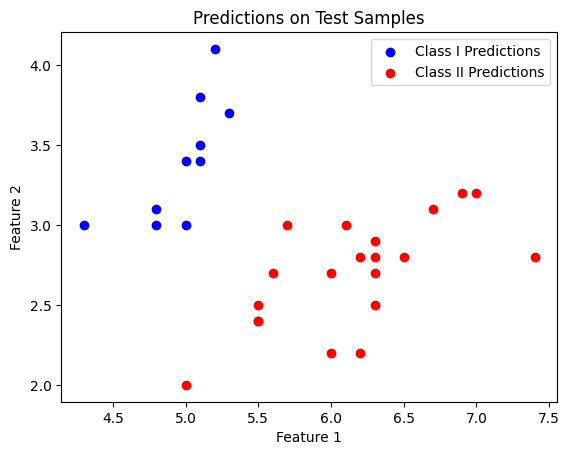

In [ ]:
import matplotlib.pyplot as plt

# Plotting the test samples
plt.scatter(X_test[predictions == 1][:, 0], X_test[predictions == 1][:, 1], color='blue', label='Class I Predictions')
plt.scatter(X_test[predictions == -1][:, 0], X_test[predictions == -1][:, 1], color='red', label='Class II Predictions')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predictions on Test Samples')
plt.legend()
plt.show()